In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#encoding
type = list(df.type.unique())
for i in range(len(type)):
    df.type.replace({type[i]:i},inplace=True)
df.type

0          0
1          0
2          1
3          2
4          0
          ..
6362615    2
6362616    1
6362617    2
6362618    1
6362619    2
Name: type, Length: 6362620, dtype: int64

<Axes: >

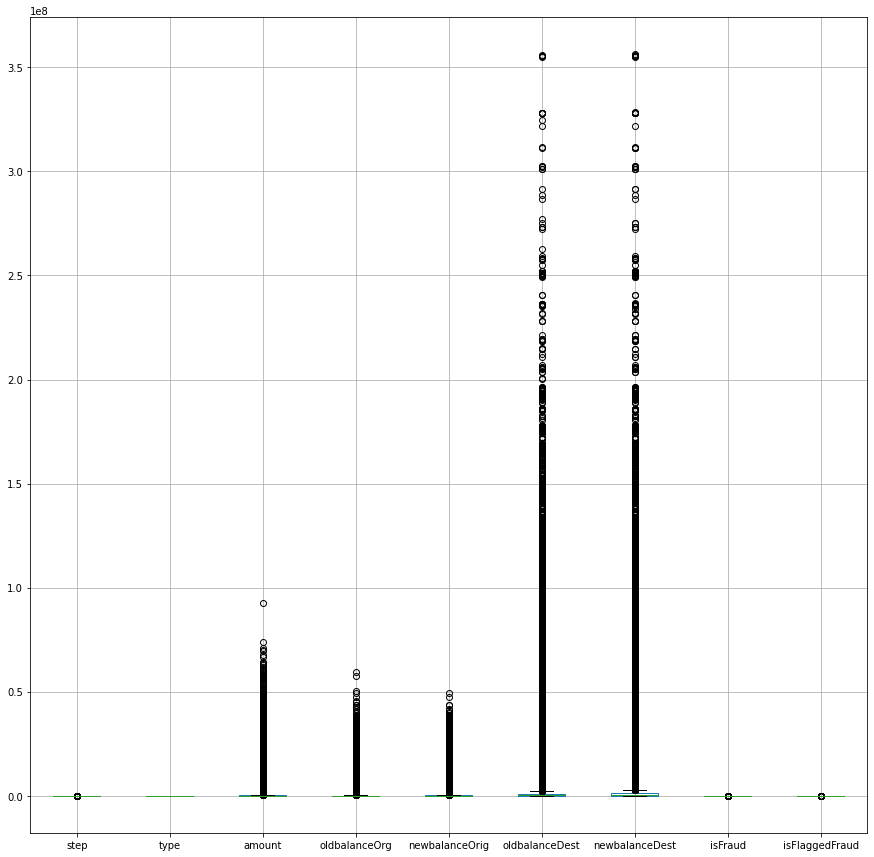

In [5]:
#outlier detection
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
df.boxplot()

In [ ]:
#IQR method or normalization can be implemented to treat outliers but in this problem statement outliers play a very important role in the training of the model

In [40]:
#dropping uneccesary features
col = ['nameOrig','nameDest']
df = df.drop(columns=col,axis=1)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

multiclass_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multilayer Perceptron': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False, iterations=100, depth=10, learning_rate=0.05, loss_function='MultiClass'),
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true,y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro')
}



In [42]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,0,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,2,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,0,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,1,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,1,850002.52,850002.52,0.00,0.00,0.00,1,0


In [43]:
input_data = df.iloc[: , :6]
X_train, X_test, y_train, y_test = train_test_split(input_data, df['isFraud'], test_size=.3, random_state=42)

In [44]:
fitted_models = {}
model_names = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','AdaBoost','Bagging','SVM','K-Nearest Neighbors','Naive Bayes','Multilayer Perceptron','XGBoost','LightGBM','CatBoost']
scored_metrics = {model_name: {'Accuracy': None, 'Precision': None, 'Recall': None} for model_name in model_names}

for model_name, model in multiclass_models.items():
    fitted_models[model_name] = model.fit(X_train, y_train)
    for metric_name, metric in metrics.items():
        scored_metrics[model_name][metric_name] = metric(y_test, model.predict(X_test))

c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\neighbors\_classification.py:230: FutureWarning: Unlike other reduction functions

[LightGBM] [Info] Number of positive: 5778, number of negative: 4448056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.265974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 4453834, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001297 -> initscore=-6.646165
[LightGBM] [Info] Start training from score -6.646165


In [45]:
comp = pd.DataFrame(scored_metrics).style.background_gradient(cmap='Greens')
comp

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Bagging,SVM,K-Nearest Neighbors,Naive Bayes,Multilayer Perceptron,XGBoost,LightGBM,CatBoost
Accuracy,0.998406,0.999637,0.999667,0.998890,0.999223,0.999710,0.999110,0.999442,0.621046,0.999232,0.999749,0.998142,0.999409
Precision,0.689677,0.930462,0.975298,0.807163,0.954419,0.962602,0.987901,0.909677,0.501335,0.849438,0.967246,0.678380,0.975830
Recall,0.697534,0.926401,0.889502,0.673167,0.716810,0.920285,0.654821,0.860268,0.746912,0.849295,0.931789,0.784970,0.782323


In [46]:
#model with the best metrics is selected
model_fraud = XGBClassifier(n_estimators=100, random_state=42)
model_fraud.fit(X_train, y_train)

    # Make predictions
predicted_fraud = model_fraud.predict(X_test)
print(predicted_fraud)

[0 0 0 ... 0 0 0]


In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(predicted_fraud, y_test)
print(acc)

0.9997490551586191


In [48]:
from sklearn import metrics
print ('Classification Report:\n', metrics.classification_report(y_test, predicted_fraud))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.86      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



In [49]:
import joblib
file = 'model_fraud.sav'
joblib.dump(model_fraud, file)

['model_fraud.sav']